# 09_09 엘모(Embeddings from Language Model, ELMo)

출처: https://wikidocs.net/33930

텐서플로우 1.0 버전 지원안하므로... 코랩에서 실습 불가능

로컬컴 다운그레이드하는것보다...

그냥 이론만 보고 넘어감.

 ELMo의 가장 큰 특징은 사전 훈련된 언어 모델(Pre-trained language model)을 사용한다는 점입니다. 이는 ELMo의 이름에 LM이 들어간 이유입니다.
 
 # 1. ELMo(Embeddings from Language Model)

Bank

### Bank Account(은행 계좌) <-> River Bank(강둑)

Word2Vec이나 GloVe 등으로 표현된 임베딩 벡터들은 이를 제대로 반영하지 못한다

Word2Vec이나 GloVe-> Bank란 단어를 [0.2 0.8 -1.2]라는 임베딩 벡터로 임베딩

은행계좌와 강둑이라는 전혀 다른 의미임에도 불구하고 두 가지 상황 모두에서 [0.2 0.8 -1.2]의 벡터가 사용됩니다.

같은 표기의 단어라도 문맥에 따라서 다르게 워드 임베딩을 할 수 있으면 자연어 처리의 성능을 올릴 수 있을 것입니다. 워드 임베딩 시 문맥을 고려해서 임베딩을 하겠다는 아이디어가 문맥을 반영한 워드 임베딩(Contextualized Word Embedding) 입니다.

# 2. biLM(Bidirectional Language Model)의 사전 훈련



In [1]:
from IPython.display import Image

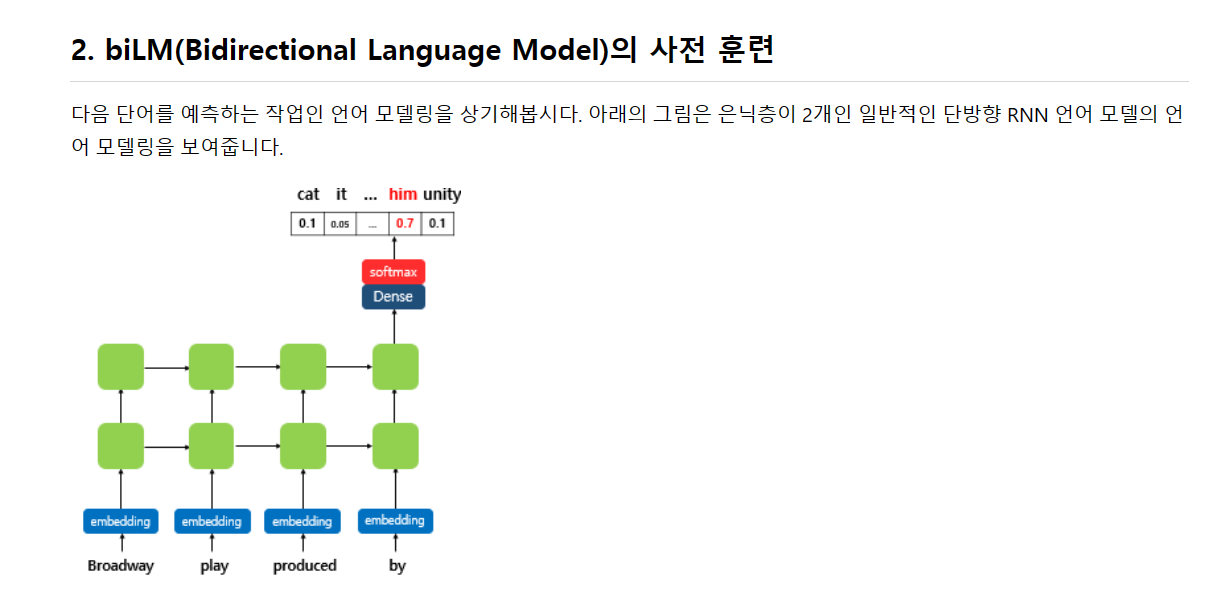

In [2]:
Image("image/09-09-01 elmo.png")

그런데 ELMo는 위의 그림의 순방향 RNN 뿐만 아니라, 위의 그림과는 반대 방향으로 문장을 스캔하는 역방향 RNN 또한 활용합니다. ELMo는 양쪽 방향의 언어 모델을 둘 다 학습하여 활용한다고하여 이 언어 모델을 biLM(Bidirectional Language Model) 이라고 합니다.



ELMo에서 말하는 biLM은 기본적으로 다층 구조(Multi-layer)를 전제로 합니다. 은닉층이 최소 2개 이상이라는 의미입니다. 아래의 그림은 은닉층이 2개인 순방향 언어 모델과 역방향 언어 모델의 모습을 보여줍니다

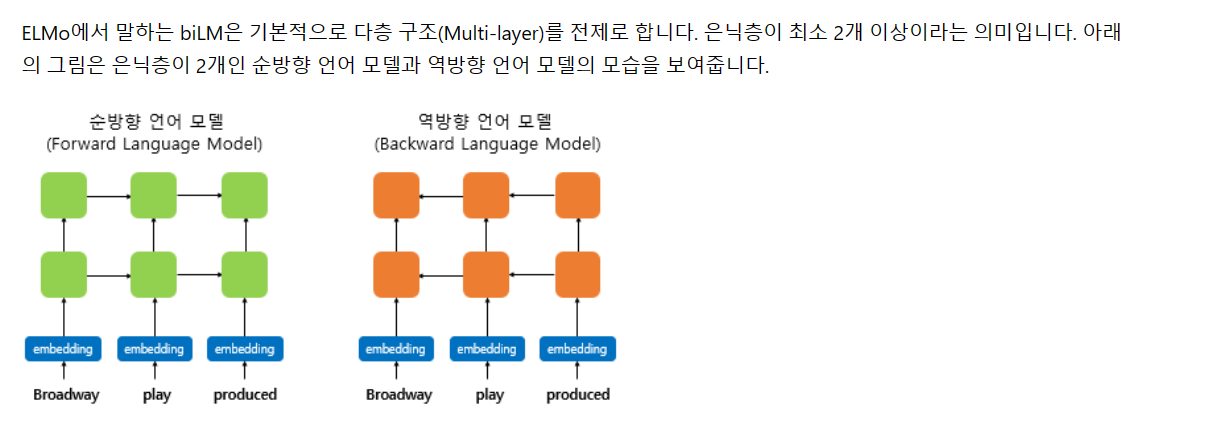

In [3]:
Image("image/09-09-02 elmo.png")

ELMo에서 말하는 biLM은 기본적으로 다층 구조(Multi-layer)를 전제로 합니다. 은닉층이 최소 2개 이상이라는 의미입니다. 아래의 그림은 은닉층이 2개인 순방향 언어 모델과 역방향 언어 모델의 모습을 보여줍니다.

##### 이때 biLM의 각 시점의 입력이 되는 단어 벡터는 이번 챕터에서 설명한 임베딩 층(embedding layer)을 사용해서 얻은 것이 아니라 합성곱 신경망을 이용한 문자 임베딩(character embedding)을 통해 얻은 단어 벡터입니다. 

### 문자 임베딩에 대한 설명은 'NLP를 위한 합성곱 신경망' 챕터에서 다루는 내용으로 여기서는 임베딩층, Word2Vec 등 외에 단어 벡터를 얻는 또 다른 방식도 있다고만 알아둡시다. 

### 문자 임베딩은 마치 서브단어(subword)의 정보를 참고하는 것처럼 문맥과 상관없이 dog란 단어와 doggy란 단어의 연관성을 찾아낼 수 있습니다. 또한 이 방법은 OOV에도 견고한다는 장점이 있습니다.


# *주의할 점은 앞서 설명한 양방향 RNN과 ELMo에서의 biLM은 다릅니다. 

### 양방향 RNN은 순방향 RNN의 은닉 상태와 역방향의 RNN의 은닉 상태를 연결(concatenate)하여 다음층의 입력으로 사용함. 

###  반면, biLM의 순방향 언어모델과 역방향 언어모델이라는 두 개의 언어 모델을 별개의 모델로 보고 학습합니다.

-----

# 3. biLM의 활용

biLM이 언어 모델링을 통해 학습된 후 ELMo가 사전 훈련된 biLM을 통해 입력 문장으로부터 단어를 임베딩하기 위한 과정을 보겠습니다.

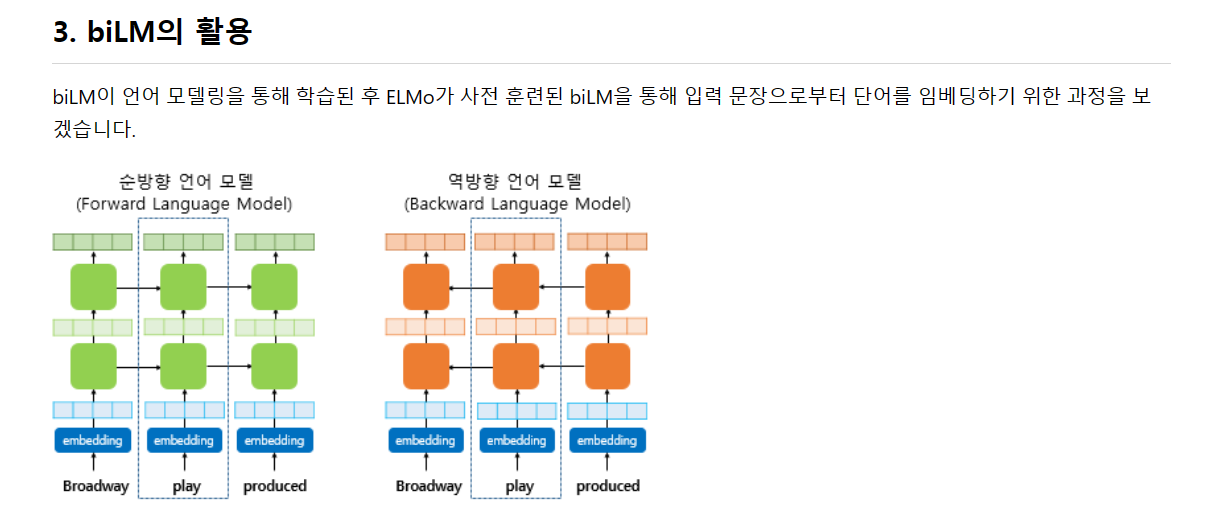

In [5]:
Image("image/09-09-03 elmo.png")

이 예제에서는 play란 단어가 임베딩이 되고 있다는 가정 하에 ELMo를 설명합니다. play라는 단어를 임베딩 하기위해서 ELMo는 위의 점선의 사각형 내부의 각 층의 결과값을 재료로 사용합니다. 다시 말해 해당 시점(time step)의 BiLM의 각 층의 출력값을 가져옵니다. 그리고 순방향 언어 모델과 역방향 언어 모델의 각 층의 출력값을 연결(concatenate)하고 추가 작업을 진행

여기서 각 층의 출력값이란 첫번째는 임베딩 층을 말하며, 나머지 층은 각 층의 은닉 상태를 말합니다. ELMo의 직관적인 아이디어는 각 층의 출력값이 가진 정보는 전부 서로 다른 종류의 정보를 갖고 있을 것이므로, 이들을 모두 활용한다는 점

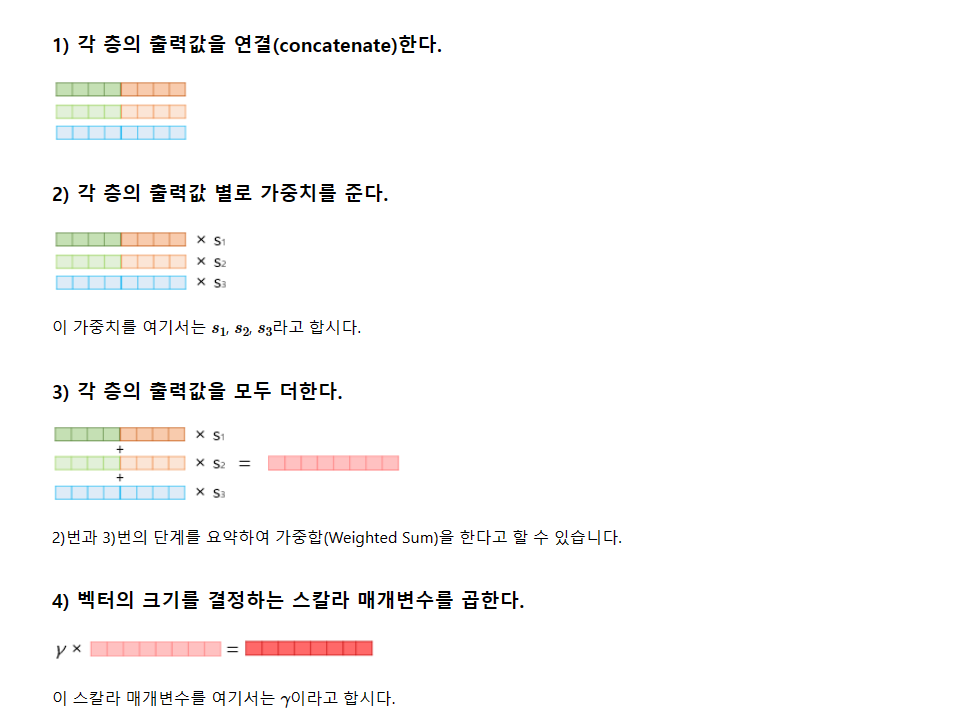

In [7]:
Image("image/09-09-04 elmo.png")

이렇게 완성된 벡터를 ELMo 표현(representation)이라고 합니다. 지금까지는 ELMo 표현을 얻기 위한 과정이고 이제 ELMo를 입력으로 사용하고 수행하고 싶은 텍스트 분류, 질의 응답 시스템 등의 자연어 처리 작업이 있을 것입니다. 예를 들어 텍스트 분류 작업을 하고 싶다고 가정합시다. 그렇다면 ELMo 표현을 어떻게 텍스트 분류 작업에 사용할 수 있을까요?

ELMo 표현을 기존의 임베딩 벡터와 함께 사용할 수 있습니다. 우선 텍스트 분류 작업을 위해서 GloVe와 같은 기존의 방법론을 사용한 임베딩 벡터를 준비했다고 합시다. 이때, GloVe를 사용한 임베딩 벡터만 텍스트 분류 작업에 사용하는 것이 아니라 이렇게 준비된 ELMo 표현을 GloVe 임베딩 벡터와 연결(concatenate)해서 입력으로 사용할 수 있습니다. 

아래 그램은 ELMo 표현이 기존의 GloVe 등과 같은 임베딩 벡터와 함께 NLP 태스크의 입력이 되는 것을 보여줍니다


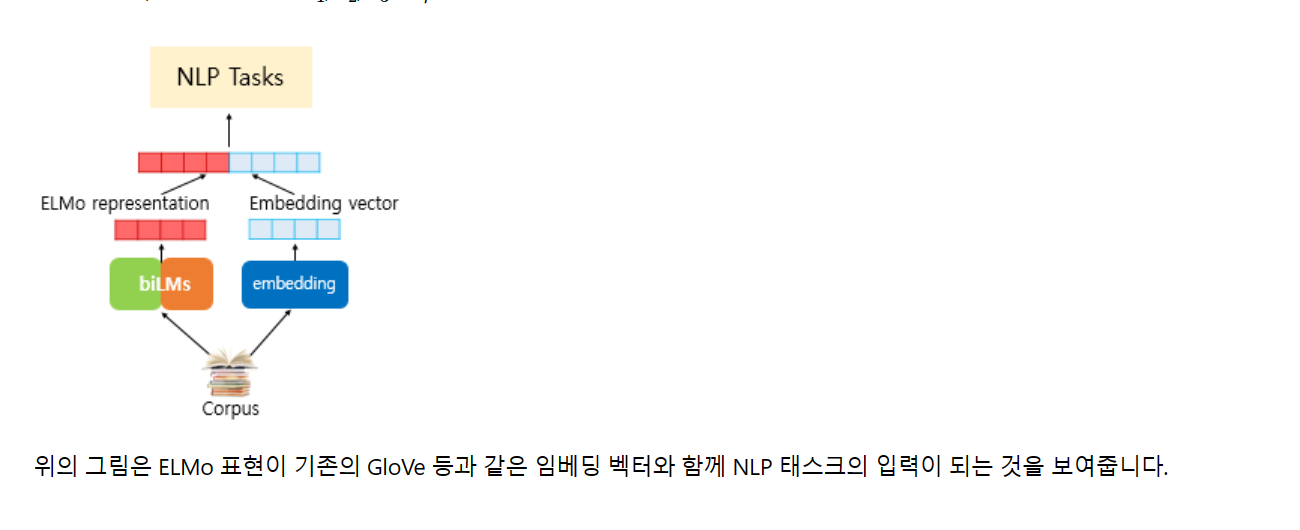

In [8]:
Image("image/09-09-05 elmo.png")

In [ ]:
%tensorflow_version 1.x 

# 버젼 낮추기 

In [ ]:
pip install tensorflow-hub

#  시작 전에 텐서플로우 허브를 인스톨

In [9]:
import tensorflow_hub as hub
import tensorflow as tf
from keras import backend as K
import urllib.request
import pandas as pd
import numpy as np

In [ ]:
# 텐서플로우 허브로부터 ELMo를 다운로드하겠습니다.

elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)
# 텐서플로우 허브로부터 ELMo를 다운로드

sess = tf.Session()
K.set_session(sess)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [ ]:
# 기본적으로 필요한 것들을 임포트하였습니다. 이제 데이터를 불러오고, 5개만 출력해보겠습니다.

파일 원본 출처 : https://www.kaggle.com/uciml/sms-spam-collection-dataset
스팸 메일 분류하기 데이터를 다운로드하겠습니다

urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin-1')
data[:5]

In [ ]:
# 여기서 필요한 건 v2열과 v1열입니다. v1열은 숫자 레이블로 바꿔야 할 필요가 있습니다. 
# 이를 각각 X_data와 y_data로 저장하겠습니다

data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
y_data = list(data['v1'])
X_data = list(data['v2'])

In [ ]:
# v2열을 X_data에 저장합니다. v1열에 있는 ham과 spam 레이블을 각각 숫자 0과 1로 바꾸고 y_data에 저장합니다.
# 정상적으로 저장되었는지 이를 각각 5개만 출력해보겠습니다.

X_data[:5]


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [ ]:
print(y_data[:5])


In [ ]:
print(len(X_data))
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

# 훈련 데이터와 테스트 데이터를 8:2 비율로 분할해보겠습니다. 
# 그런데 그 전에 이를 위해 전체 데이터 개수의 80%와 20%는 각각 몇 개인지 확인합니다.

In [ ]:
# 전체 데이터는 5,572개이며 8:2로 비율하면 각각 4,457과 1,115가 됩니다. 
# 이를 각각 훈련 데이터와 테스트 데이터의 양으로 하여 데이터를 분할하겠습니다.

X_train = np.asarray(X_data[:n_of_train]) #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = np.asarray(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4457개의 데이터만 저장
X_test = np.asarray(X_data[n_of_train:]) #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = np.asarray(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장

이제 훈련을 위한 데이터 준비는 끝났습니다. 이제 ELMo와 설계한 모델을 연결하는 작업들을 진행해보겠습니다. ELMo는 텐서플로우 허브로부터 가져온 것이기 때문에 케라스에서 사용하기 위해서는 케라스에서 사용할 수 있도록 변환해주는 작업들이 필요합니다.

In [ ]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]
# 데이터의 이동이 케라스 → 텐서플로우 → 케라스가 되도록 하는 함수

In [ ]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

모델은 ELMo를 이용한 임베딩 층을 거쳐서 256개의 뉴런이 있는 은닉층을 거친 후 마지막 1개의 뉴런을 통해 이진 분류를 수행합니다. 이진 분류를 위한 마지막 뉴런의 활성화 함수는 시그모이드 함수이며, 모델의 손실 함수는 binary_crossentropy입니다.

In [ ]:
history = model.fit(X_train, y_train, epochs=1, batch_size=60)


Epoch 1/1
4457/4457 [==============================] - 1508s 338ms/step - loss: 0.1129 - acc: 0.9619

훈련 데이터에서는 정확도 96%를 얻었습니다. 이제 테스트 데이터에 대해서 평가해보겠습니다.

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


1번의 에포크에서 테스트 데이터 정확도 98%를 얻어냅니다.

